# Part I - Loan Data from Prosper Exploration
## by Nosakhare Imasuen

## Introduction
>I'll be performing data analysis on a Prosper loan data collection. Each loan in the data set has 81 factors, including borrower rate, loan status, borrower income, borrower job status, borrower credit history, and so on. The primary goals of this project is to describe the features of factors that might impact loan status and to get some insight into the interactions between numerous variables by utilizing summary statistics and data visualizations.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_loan =pd.read_csv('prosperLoanData.csv')

In [3]:
df_loan.shape

(113937, 81)

In [4]:
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# Selecting the few features I will be working with for the exploration
sel_col = ['BorrowerAPR', 'BorrowerRate', 'IncomeRange', 'CreditGrade', 'ClosedDate', 'CurrentCreditLines', 
           'DebtToIncomeRatio', 'EmploymentStatus', 'EstimatedLoss', 'EstimatedReturn', 'IncomeVerifiable', 
           'LoanStatus', 'MonthlyLoanPayment', 'Occupation', 'ProsperRating (Alpha)','Term']
new_df_loan = df_loan[sel_col]
new_df_loan.head()

,BorrowerAPR,BorrowerRate,IncomeRange,CreditGrade,ClosedDate,CurrentCreditLines,DebtToIncomeRatio,EmploymentStatus,EstimatedLoss,EstimatedReturn,IncomeVerifiable,LoanStatus,MonthlyLoanPayment,Occupation,ProsperRating (Alpha),Term
0,0.16516,0.1580,"$25,000-49,999",C,2009-08-14 00:00:00,5.0,0.17,Self-employed,NaN,NaN,True,Completed,330.43,Other,NaN,36
1,0.12016,0.0920,"$50,000-74,999",NaN,NaN,14.0,0.18,Employed,0.0249,0.05470,True,Current,318.93,Professional,A,36
2,0.28269,0.2750,Not displayed,HR,2009-12-17 00:00:00,NaN,0.06,Not available,NaN,NaN,True,Completed,123.32,Other,NaN,36
3,0.12528,0.0974,"$25,000-49,999",NaN,NaN,5.0,0.15,Employed,0.0249,0.06000,True,Current,321.45,Skilled Labor,A,36
4,0.24614,0.2085,"$100,000+",NaN,NaN,19.0,0.26,Employed,0.0925,0.09066,True,Current,563.97,Executive,D,36


In [10]:
# copy data before cleaning
new_df_loan_clean = new_df_loan.copy()

In [11]:
new_df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
BorrowerAPR              113912 non-null float64
BorrowerRate             113937 non-null float64
IncomeRange              113937 non-null object
CreditGrade              28953 non-null object
ClosedDate               55089 non-null object
CurrentCreditLines       106333 non-null float64
DebtToIncomeRatio        105383 non-null float64
EmploymentStatus         111682 non-null object
EstimatedLoss            84853 non-null float64
EstimatedReturn          84853 non-null float64
IncomeVerifiable         113937 non-null bool
LoanStatus               113937 non-null object
MonthlyLoanPayment       113937 non-null float64
Occupation               110349 non-null object
ProsperRating (Alpha)    84853 non-null object
Term                     113937 non-null int64
dtypes: bool(1), float64(7), int64(1), object(7)
memory usage: 13.1+ MB


In [12]:
#Eliminating rolls with empty occupation and rating
das = ['Occupation', 'ProsperRating (Alpha)']

for ds in das:
    new_df_loan_clean = new_df_loan_clean[~new_df_loan_clean[ds].isnull()]
    
new_df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 16 columns):
BorrowerAPR              83520 non-null float64
BorrowerRate             83520 non-null float64
IncomeRange              83520 non-null object
CreditGrade              0 non-null object
ClosedDate               25992 non-null object
CurrentCreditLines       83520 non-null float64
DebtToIncomeRatio        76224 non-null float64
EmploymentStatus         83520 non-null object
EstimatedLoss            83520 non-null float64
EstimatedReturn          83520 non-null float64
IncomeVerifiable         83520 non-null bool
LoanStatus               83520 non-null object
MonthlyLoanPayment       83520 non-null float64
Occupation               83520 non-null object
ProsperRating (Alpha)    83520 non-null object
Term                     83520 non-null int64
dtypes: bool(1), float64(7), int64(1), object(7)
memory usage: 10.3+ MB


In [13]:
# drop column no longer with 0 records
new_df_loan_clean.drop('CreditGrade', axis=1, inplace=True)

In [14]:
new_df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 15 columns):
BorrowerAPR              83520 non-null float64
BorrowerRate             83520 non-null float64
IncomeRange              83520 non-null object
ClosedDate               25992 non-null object
CurrentCreditLines       83520 non-null float64
DebtToIncomeRatio        76224 non-null float64
EmploymentStatus         83520 non-null object
EstimatedLoss            83520 non-null float64
EstimatedReturn          83520 non-null float64
IncomeVerifiable         83520 non-null bool
LoanStatus               83520 non-null object
MonthlyLoanPayment       83520 non-null float64
Occupation               83520 non-null object
ProsperRating (Alpha)    83520 non-null object
Term                     83520 non-null int64
dtypes: bool(1), float64(7), int64(1), object(6)
memory usage: 9.6+ MB


### What is the structure of your dataset?
>There are 113,937 loans in this data collection, each containing factors such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and more. The data set can simply be described to contain data about the individual (borrower) and details about the loan in service.

### What is/are the main feature(s) of interest in your dataset?
>I will love to figure out which features are better for predicting the borrower's loan APR (Annual Percentage Rate).
Does the borrower's employment status has any significance on the borrowerAPR?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
>The dataset has various variables, all of which are significant, but there are too many to work on. As a result, the variables will be limited to a reasonable number, such as BorrowerAPR, BorrowerRate, IncomeRange, CreditGrade, ClosedDate, CurrentCreditLines, DebToIncomeRatio, EmploymentStatus, IncomeVerifiable, LoanStatus, MonthlyLoanPayment, ProsperRating (Alpha), and so on.

## Univariate Exploration

What are the various ProsperRatings (Alpha) and their distribution allocation in the dataset?

C     17956
B     15329
A     14337
D     14081
E      9621
HR     6878
AA     5318
Name: ProsperRating (Alpha), dtype: int64

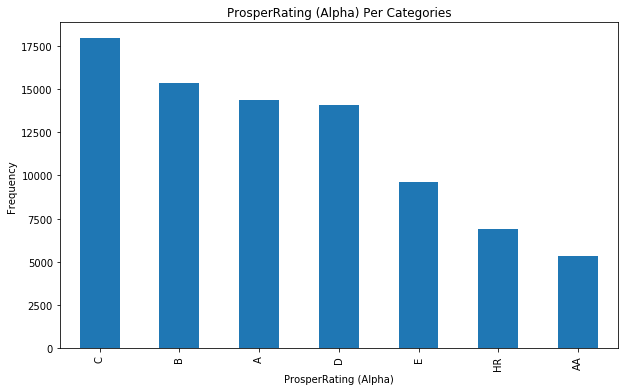

In [15]:
# Plot to reveal the creditgrade distribution
plt.figure(figsize=[10, 6])
col = sb.color_palette()[0]
new_df_loan_clean['ProsperRating (Alpha)'].value_counts().plot.bar(color=col )

plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Frequency')
plt.title('ProsperRating (Alpha) Per Categories');
new_df_loan_clean['ProsperRating (Alpha)'].value_counts()

There are 8 different ProsperRating (Alpha) at the moment the listing went live, and grade C has the highest frequency.

#### Exploring the borrower's income range and it frequency

In [16]:
new_df_loan_clean['IncomeRange'].value_counts()

$50,000-74,999    25293
$25,000-49,999    23574
$100,000+         15166
$75,000-99,999    14401
$1-24,999          4392
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

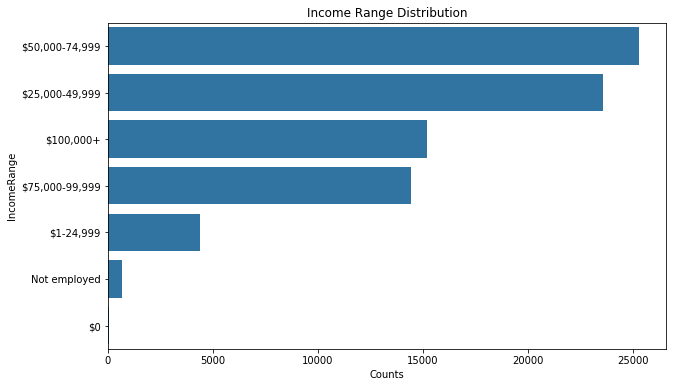

In [17]:
# Distribution based on income range
plt.figure(figsize=[10, 6])
sb.countplot(data = new_df_loan_clean, y = 'IncomeRange', color = col)
#plt.xticks(t_props * n_pokemon, t_names)
plt.xlabel('Counts')
plt.title('Income Range Distribution')
plt.show()

This graph depicts the income range of persons that have obtained a loan. It also illustrates that the majority of people who have a loan have an income ranging from 20k to 75k.

#### Exploring the borrower's occupation and it frequency

What are the various occupation of the borrowers in the dataset?

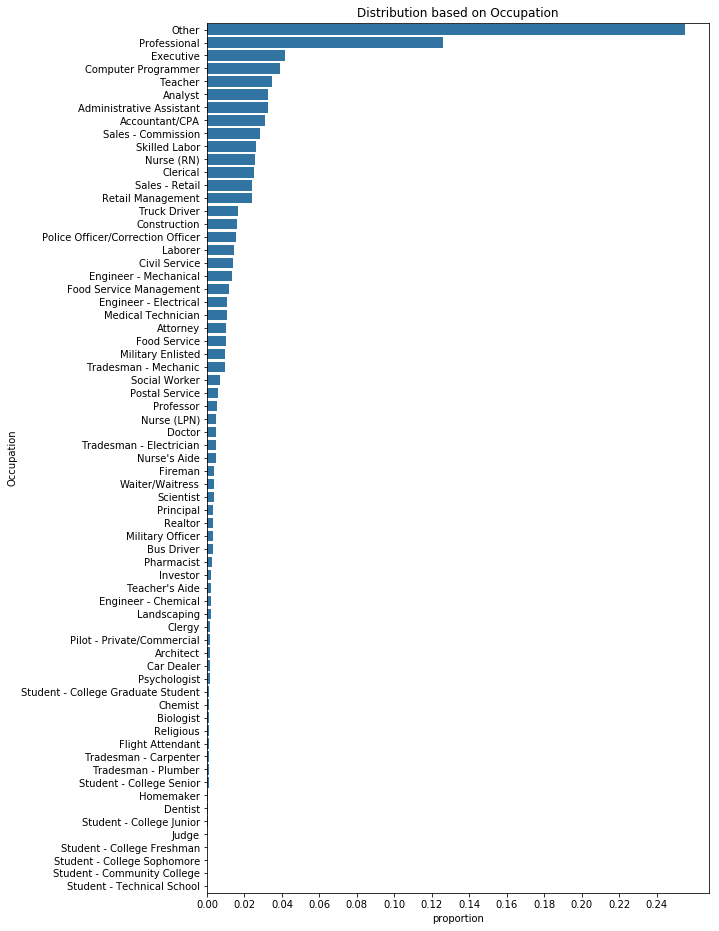

In [18]:
# exploring data using the countplot visual
plt.figure(figsize=[9, 16])

x_counts = new_df_loan_clean['Occupation'].value_counts()
t_order = x_counts.index

# Compute largest proportion
# Returns the sum of all not-null values in `occupation` column
n_pokemon = new_df_loan_clean['Occupation'].count()
m_t_count = x_counts[0]
m_prop = m_t_count / n_pokemon

# establish t locations and create plot
t_props = np.arange(0, m_prop, 0.02)
t_names = ['{:0.2f}'.format(v) for v in t_props]
sb.countplot(data = new_df_loan_clean, y = 'Occupation', color = col, order = t_order)
plt.xticks(t_props * n_pokemon, t_names)
plt.xlabel('proportion')
plt.title('Distribution based on Occupation')
plt.show()

We can see that an executive is at the top of the occupation categories, followed by a computer programmer, teacher, and analyst, disregarding the 'others' and 'professional' occupation categories.

#### Exploring the borrower's APR and Rate with their frequency

Does APR and Rate has a closely relation representation?

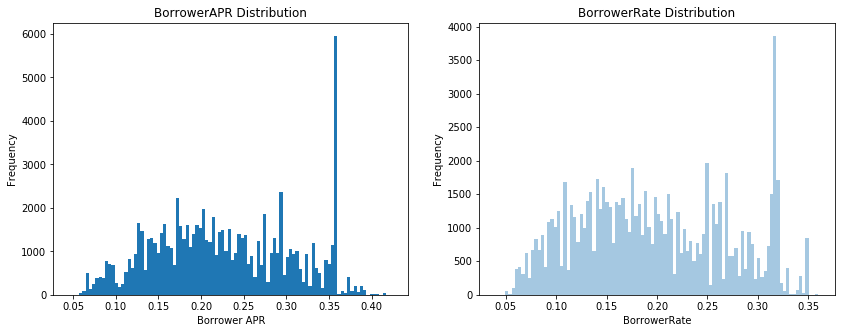

In [19]:
# Comparing the point for APR and Rate
plt.figure(figsize=[14, 5])
plt.subplot(1,2,1)

plt.hist(data = new_df_loan_clean, x = 'BorrowerAPR', bins = 100,);
plt.xlabel('Borrower APR');
plt.title('BorrowerAPR Distribution')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sb.distplot(new_df_loan_clean['BorrowerRate'], kde = False, bins = 100)
plt.xlabel('BorrowerRate')
plt.title('BorrowerRate Distribution')
plt.ylabel('Frequency')
plt.show()

As observed, the lowerest BorrowerAPR is at around 0.06% and the highest is at around 0.41%. While the lowerest BorrowerRate is at around 0.05% and the highest is at around 0.35%. Because the APR is always greater than the interest rate, the distribution of BorrowerAPR and BorrowerRate should be comparable with a minor variation. Which is exactly what the chats have revealed

#### Exploring the bowwer's Estimated return and it frequency

At what percentage do we have most borrowers lending from the company?

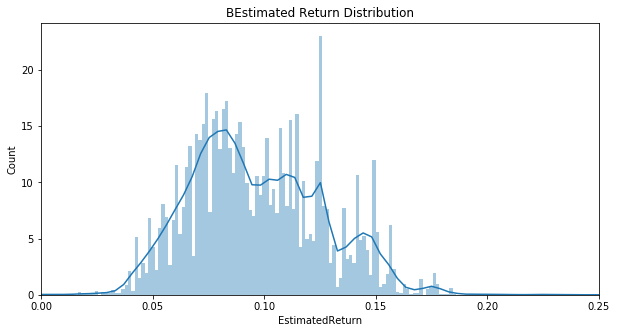

In [21]:
# histogram plot distribution for the estimated return
plt.figure(figsize = [10,5])
bin = np.arange(0, new_df_loan_clean['EstimatedReturn'].max(), 0.0015)
sb.distplot(new_df_loan_clean['EstimatedReturn'], bins = bin)
plt.xlabel('EstimatedReturn')
plt.xlim(0, .25)
plt.ylabel('Count')
plt.title('BEstimated Return Distribution')
plt.show()

The majority of the data falls within the range of 5% to 13%. Some percentage standards, such as 7.5 percent, 8 percent, 11 percent, and 12.5 percent, could be observed with higher frequency. Surprisingly, the highest interest rate is roughly 12.5 percent.

#### Exploring the bowwer's loan status distribution

What's the status of all borrowers in the system?

Current                   55272
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

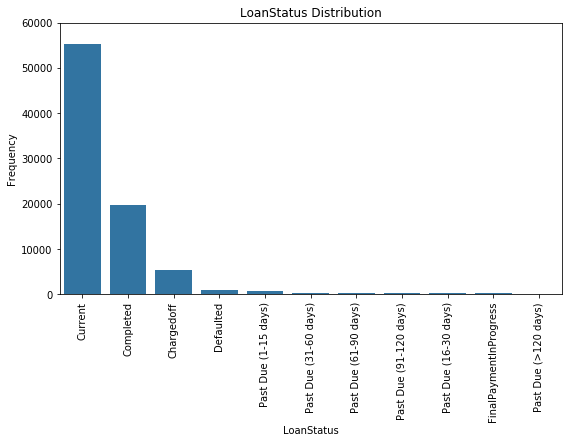

In [22]:
# checking the status of all loan at the moment
x_counts = new_df_loan_clean['LoanStatus'].value_counts()
t_order = x_counts.index
plt.figure(figsize=[9, 5]);
sb.countplot(data =new_df_loan_clean, x = 'LoanStatus', color = col, order= t_order);
plt.title('LoanStatus Distribution');
plt.ylabel('Frequency');
plt.ylim(0, 60000)
plt.xlabel('LoanStatus');
plt.xticks(rotation=90);
new_df_loan_clean['LoanStatus'].value_counts()

Most of the borrower's loan status is currently running. However, notice that fractions have defaulted or have overdue payments.

#### Exploring the monthly loan repayment distribution

What are the monthly commitment from the borrowers?

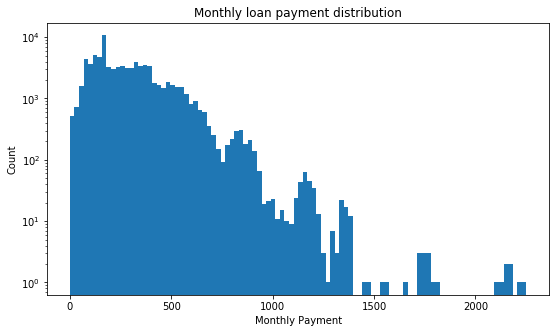

In [24]:
# Using histogram to know the where majority of the borrowers stand
plt.figure(figsize=[9, 5]);
plt.hist(data = new_df_loan_clean, x = 'MonthlyLoanPayment', bins = 100);

plt.title('Monthly loan payment distribution');
plt.xlabel('Monthly Payment');
plt.ylabel('Count');
plt.yscale('log', nonposy='clip');

The graph shows that the majority of people have monthly payments of less than $1,000, and the trend is heavily skewed to the right.

#### Exploring the Distribution of Debt to Income Ratio

What's the debt ratio of the borrowers?

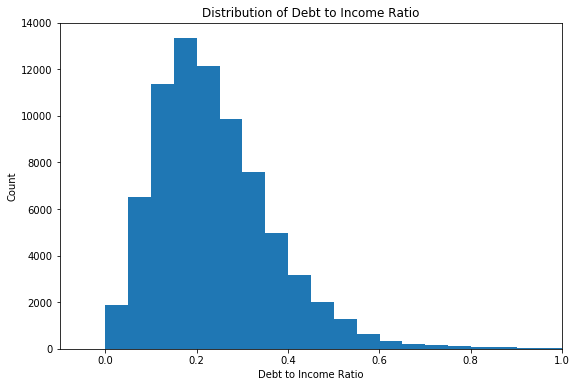

In [25]:
# distribution of Debt to Income Ratio
plt.figure(figsize = [9,6])
new_df_loan_clean['DebtToIncomeRatio'].hist(bins=200, grid=False)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.title('Distribution of Debt to Income Ratio')
plt.ylabel('Count')
plt.show()

The majority of borrowers who apply for a loan tend to have a debt-to-income ratio of roughly 18 percent.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>I chose 20 features from the 81 features in the dataset to summarise the factors of interest. BorrowerAPR, BorrowerRate, IncomeRange, CreditGrade, ClosedDate, CurrentCreditLines, DebToIncomeRatio, EmploymentStatus, IncomeVerifiable, LoanStatus, MonthlyLoanPayment, ProsperRating (Alpha), and others are some of the features available.

>Borrower APR appears to be distributed in a multimodal fashion. The majority of the numbers are between 0.06 and 0.36, with 0.36 being the most important.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>The indicated monthly income distributions are severely skewed to the right. The majority of monthly salaries are in the range of 25,000 to 75,000, while some are astronomically high, exceeding 100k. Surprisingly, most borrowers, having a comfortable income range, have a monthly repayment plan of 1,000 or less. This simply implies that borrowers are applying for a lower loan value despite having the capacity to go for a higher value.

>In order to ensure every borrower in this data has the ability to fulfill their commitment, data of borrowers without occupation and rating were dropped.

## Bivariate Exploration

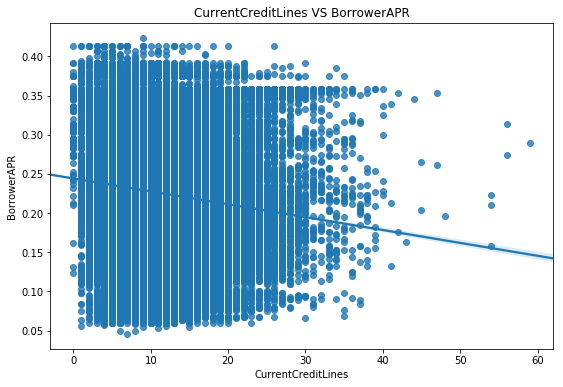

In [26]:
# What's the relationship between estimated return and borrowerAPR
plt.figure(figsize = [9,6])
sb.regplot(data = new_df_loan_clean, x = 'CurrentCreditLines', y = 'BorrowerAPR');
plt.xlabel('CurrentCreditLines')
plt.ylabel('BorrowerAPR')
plt.title('CurrentCreditLines VS BorrowerAPR')
plt.show()

The regression line in a scatter plot showing a negative correlation between the two variables.

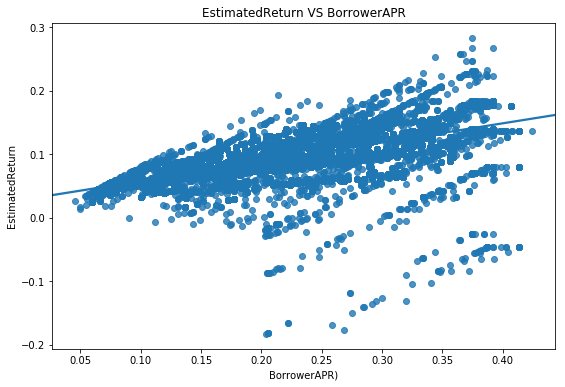

In [27]:
# What's the relationship between estimated return and borrowerAPR
plt.figure(figsize = [9,6])
sb.regplot(data = new_df_loan_clean, x = 'BorrowerAPR', y = 'EstimatedReturn');
plt.xlabel('BorrowerAPR)')
plt.ylabel('EstimatedReturn')
plt.title('EstimatedReturn VS BorrowerAPR')
plt.show()

The regression line in a scatter plot showing a positive correlation between the two variables.

#### Comparing two plot to examine the relationship

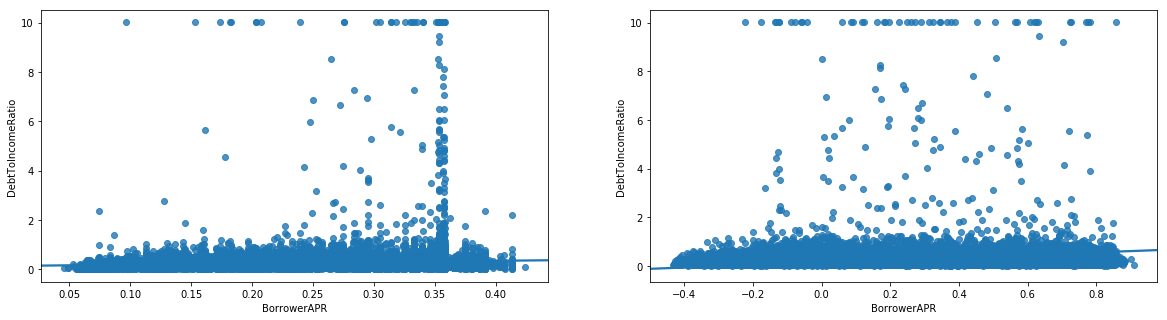

In [29]:
# checking for relation between debt to income ration and borrowerAPR
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.regplot(data = new_df_loan_clean, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', truncate=False);


plt.subplot(1, 2, 2)
sb.regplot(data = new_df_loan_clean, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', truncate=False, x_jitter=0.5);

The scatter plot on the left is a simple scatter plot, but the scatter plot on the right has jitter.

The degree of variability in the data and the strength of the association are both unclear in the left scatter plot above. In such circumstances, we might wish to use transparency and jitter to make the scatterplot more useful. The data points in the right scatter plot have been jittered.

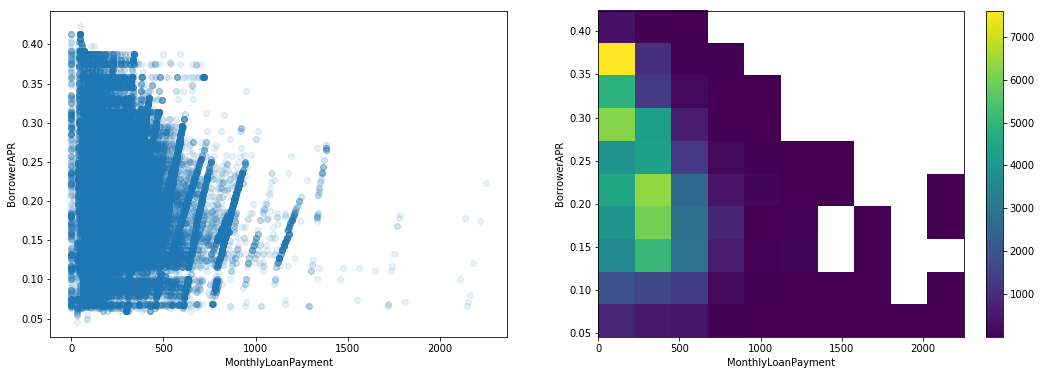

In [30]:
# Relationship between BorrowerAPR and Monthlyloanpayment
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = new_df_loan_clean, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('BorrowerAPR');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = new_df_loan_clean, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', cmin=0.5)
plt.colorbar()
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('BorrowerAPR');

This makes sense because most people have a lower monthly commitment value.

#### Are there relationship among the features?

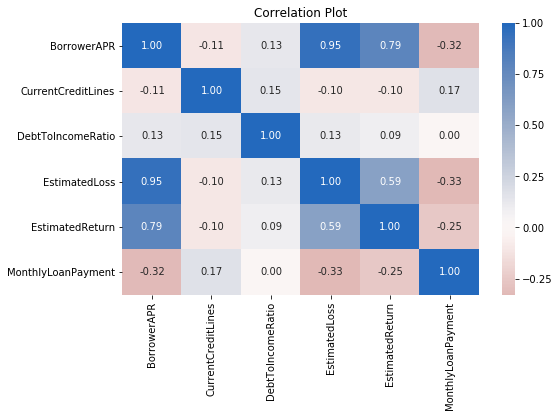

In [32]:
# Using correlation plot to examine the relationship among some features
num_vars = ['BorrowerAPR', 'CurrentCreditLines', 'DebtToIncomeRatio', 'EstimatedLoss', 'EstimatedReturn', 'MonthlyLoanPayment']

plt.figure(figsize = [8, 5])
sb.heatmap(new_df_loan_clean[num_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

BorrowerAPR and MonthlyLoanPayment have a negative relationship, which makes a lot of sense. The greater the monthly payment, the lesser the borrowerAPR. The greater the monthly commitment, the better the relationship, and a lower APR is considered. BorrowerAPR and EstimatedLoss have a nearly 1:1 association, which is greater than the correlation between BorrowerAPR and EstimatedReturn. It makes sense since the predicted loss or return is subject to a high degree of certainty.

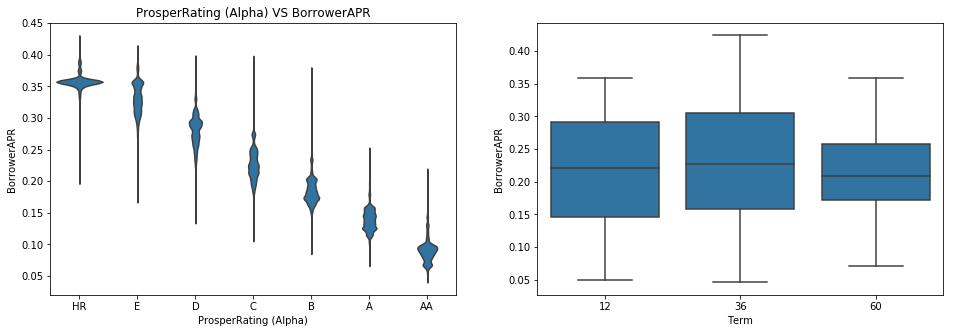

In [33]:
# relationship between ProsperRating (Alpha) and BorrowerAPR and Term
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=new_df_loan_clean, x='ProsperRating (Alpha)', y='BorrowerAPR', color=col, inner=None, 
              order=['HR', 'E', 'D', 'C', 'B', 'A', 'AA']);
plt.title('ProsperRating (Alpha) VS BorrowerAPR')

plt.subplot(1, 2, 2)
sb.boxplot(data=new_df_loan_clean, x='Term', y='BorrowerAPR', color=col)
plt.show()

There is a negative correlation between ProsperRating and BorrowerAPR. ProsperRating has an influence or impact on the percentage of the borrowerAPR. The better the Prosper Rating the lesser the BorrowerAPR. Also, it was observed that BorrowerAPR falls as loan duration lengthens significantly.

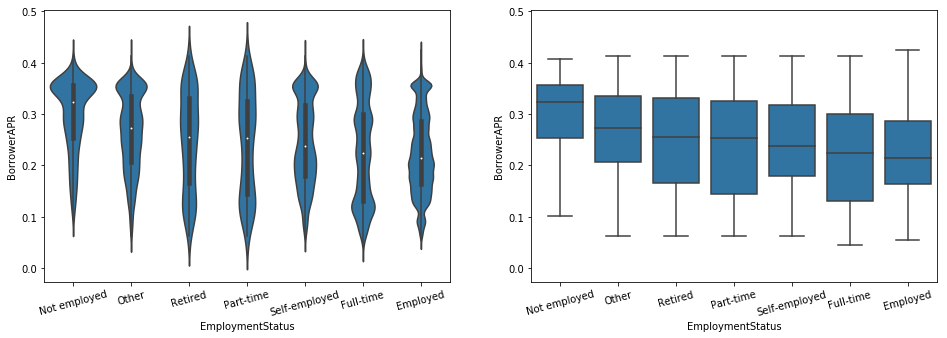

In [34]:
# relationship between BorrowerAPR and EmploymentStatus
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=new_df_loan_clean, x='EmploymentStatus', y='BorrowerAPR', color=col,
                   order =['Not employed', 'Other','Retired','Part-time','Self-employed','Full-time','Employed'])
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=new_df_loan_clean, x='EmploymentStatus', y='BorrowerAPR', color=col,
          order =['Not employed', 'Other','Retired','Part-time','Self-employed','Full-time','Employed'])
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim())
plt.show()

Furthermore, there is also a slight negative correlation between BorrowerAPR and work status. This indicates that someone that is employed, has their own business, or work as part-time has a lower BorrowerAPR compared to either unemployed, retired or others.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>Borrower APR is negatively related to monthly payback, which means that the higher the repayment amount, the lower the APR. The data also show that the lower the BorrowerAPR, the better the Current Credit line.

>There is a negative correlation between ProsperRating and BorrowerAPR. ProsperRating has an influence or impact on the percentage of the borrowerAPR. The better the Prosper Rating the lesser the BorrowerAPR. Also, it was observed that BorrowerAPR falls as loan duration lengthens significantly.

>Furthermore, there is also a sliht negative correlation between BorrowerAPR and work status. This indicates that someone that is employed, has their own business, or work as part-time has a lower BorrowerAPR compared to either unemployed, retired or others.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>Current Credit Lines are inversely connected with BorrowerAPR, which makes sense because the better the current credit line, the lower the borrowerAPR. Furthermore, the statistics show that the current credit line has no linear relationship with the debt-to-income ratio.

## Multivariate Exploration

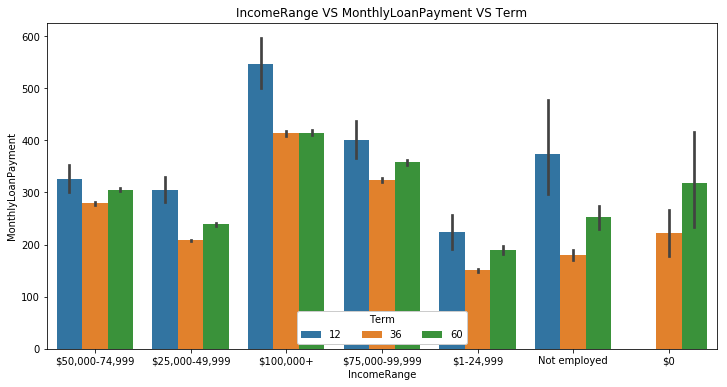

In [36]:
# relationship among IncomeRange VS MonthlyLoanPayment VS Term using the barplot
plt.figure(figsize = [12, 6])
ax = sb.barplot(data = new_df_loan_clean, x = 'IncomeRange', y = 'MonthlyLoanPayment', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term')
plt.title('IncomeRange VS MonthlyLoanPayment VS Term')
plt.show()

The data reveals that for all terms, there are more loans on 12-month terms compared to other terms across all salary ranges of the borrowers. Also, an income range of above $100,000 has the highest monthly repayment for all the repayment terms.

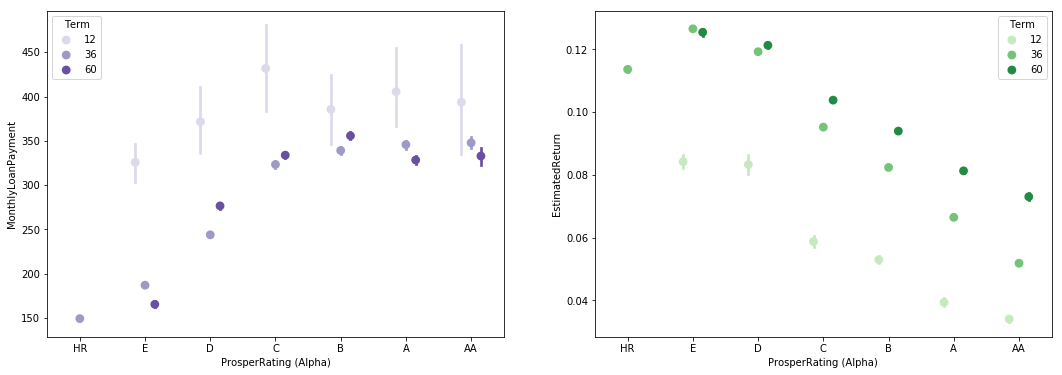

In [37]:
# Relation among ProsperRating (RAting) VS MonthlyLoanPayment VS Term VS EstimatedReturn
fig, ax = plt.subplots(ncols=2, figsize=[18,6])
sb.pointplot(data = new_df_loan_clean, x = 'ProsperRating (Alpha)', y = 'MonthlyLoanPayment', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.3, ax=ax[0], order=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'])
sb.pointplot(data = new_df_loan_clean, x = 'ProsperRating (Alpha)', y = 'EstimatedReturn', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.3, ax=ax[1], order=['HR', 'E', 'D', 'C', 'B', 'A', 'AA']);

There's an initial positive correlation among MonthlyLoanPayment, ProsperRating (Alpha) and Term but normarlise on A and AA rating. On the other end, it's a negative correlation that exxit among EstimatedReturn, ProsperRating (Alpha) and Term.

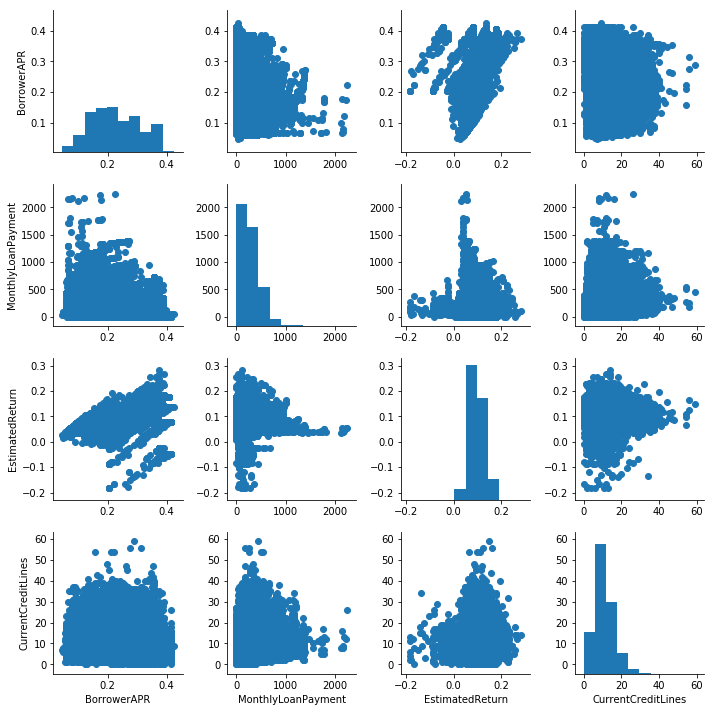

In [38]:
# Are there relationship among the selected features
g = sb.PairGrid(data = new_df_loan_clean, vars = ['BorrowerAPR','MonthlyLoanPayment',
                                                  'EstimatedReturn', 'CurrentCreditLines'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>Multivariate Exploration might include the correlation and other graphs in prior plots. The connection between expected return and monthly loan payments is negative and skewed to the left. Furthermore, the present credit line and monthly loan payments have a negative connection that is skewed to the right.

## Conclusions
>This research uses a Prosper loan dataset with 81 variables and 113,937 observations. With so many variables to consider, it will take a long time, if not weeks. As a result, some variables were chosen among others that could give additional details based on the element of the data that I am interested in.

>The data dictionary was analyzed in order to properly grasp each variable in order to make sense of the data. Following then, the BorrowerAPR became the key focus of the investigation.

>The data was then cleared of empty roles, particularly BorrowerAPR and Occupation, during the wrangling step. In addition, column(s) with no data after the initial cleansing were removed from the list of variables. The goal of the cleaning is to guarantee that the data that was analyzed can satisfy their obligations.

>Borrower APR is negatively related to monthly payback, which means that the higher the repayment amount, the lower the APR. The data also show that the lower the BorrowerAPR, the better the Current Credit line.

>There is a negative correlation between ProsperRating and BorrowerAPR. ProsperRating has an influence or impact on the percentage of the borrowerAPR. The better the Prosper Rating the lesser the BorrowerAPR. Also, it was observed that BorrowerAPR falls as loan duration lengthens significantly.

>Furthermore, there is also a slight negative correlation between BorrowerAPR and work status. This indicates that someone that is employed, has their own business, or work as part-time has a lower BorrowerAPR compared to either unemployed, retired or others.

>The data reveals that for all terms, there are more loans on 12-month terms compared to other terms across all salary ranges of the borrowers. Also, an income range of above $100,000 has the highest monthly repayment for all the repayment terms.

>Current Credit Lines are inversely connected with BorrowerAPR, which makes sense because the better the current credit line, the lower the borrowerAPR. Furthermore, the statistics show that the current credit line has no linear relationship with the debt-to-income ratio.